# ** Semana 20 **

## Dos modelos: paseo aleatorio y urnas de Ehrenfest ##


**Ejercicio 1.- El paseo aleatorio unidimensional.** Supongamos que una partícula se desplaza a lo largo de la recta real en las siguientes condiciones:

- Inicialmente se encuentra situada en el origen $y=0$

- Cada segundo que pasa la partícula se desplaza una unidad hacia la derecha o hacia la izquierda. Llamamos $p$ a la probabilidad de que el desplazamiento sea hacia la derecha, y $q=1-p$ a la probabilidad de que el desplazamiento sea hacia la izquierda.

**a)** Si llamamos $y_n$ a la posición de la partícula en tiempo $n$, una forma de visualizar un recorrido concreto es representar gráficamente una línea poligonal que una los puntos $(n,y_n)$ en un cierto rango de tiempo $0\le n \le N$ para un valor $N$ dado. (Nota que en esta representación el desplazamiento de la partícula *hacia la derecha* se representa gráficamente como *subir*, y el desplazamiento *hacia la izquierda* se representa gráficamente como *bajar*).

Escribe una función de Sage que dependa de la probabilidad $p$ de ir a la derecha y de la cota temporal $N$ y devuelva la representación gráfica de un paseo aleatorio unidimensional con probabilidad $p$ de *ir a la derecha*, para el rango de tiempo $0\le n \le N$. Experimenta y observa los resultados que produce tu programa para N=1000 y distintos valores de $p$

In [25]:
def paseo(p,N, inicio=0):
    xx,yy=0,inicio
    Puntos=[(xx,yy)]
    for xx in [1..N]:
        yy += (1) if random()<p else (-1)
        Puntos+=[(xx,yy)]
    return line(Puntos)

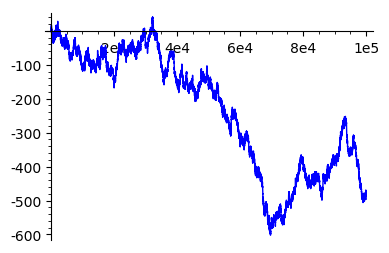

In [26]:
show(paseo(.5,100000), figsize=4)

A continuación, vamos a comparar algunos experimentos con ciertas interesantes propiedades  del paseo aleatorio unidimensional (para aprender más sobre paseos aleatorios <a href="https://en.wikipedia.org/wiki/Random_walk" target="_blank">puedes pinchar aquí</a>).

- En un *paseo simétrico* ($p=0.5$) que transcurra indefinidamente ($N \to \infty$), la probabilidad de volver alguna vez al origen es 1. Es decir, si se continua el paseo indefinidamente "todas" las trayectorias volverán alguna vez al origen.

- Pese a lo anterior, el valor esperado (el promedio) del primer tiempo $n$ tal que el paseo aleatorio vuelve al origen es $\infty$. Simplificando: "todos" los paseos volverán alguna vez al origen, pero algunos tardarán muchísimo tiempo en hacerlo. 

- De hecho, para cualquier entero r>0, un paseo aleatorio simétrico que se prolongue indefinidamente alcanza el valor y=r en algún momento con probabilidad 1.

- Las cosas cambian si el paseo no es simétrico ($p\neq 0.5$). Por ejemplo, en un paseo aleatorio unidimensional no simétrico la probabilidad de volver eventualmente al origen ya no es 1.

**b)** Escribe una función que simule la realización de un paseo aleatorio con probabilidad $p$ de ir a la derecha y devuelva True si el paseo vuelve al origen en menos de $N=10$ pasos. Ejecuta dicha función $10^3$ veces para $p=0.5$ y calcula la proporción de True que obtienes. 

Repite el cálculo cambiando el valor de $N$ a $100$, $1000$ y $10000$.

(**Notas**: como no hace falta, por supuesto, representar gráficamente estos paseos para responder a la pregunta, no necesitas almacenar todos los puntos $(n,y_n)$ para $n=0,1,\ldots$. Además ten en cuenta que no es necesario recorrer todos los pasos para paseos que pasen antes por el origen)

In [27]:
def paseoVuelve(p,N, inicio=0):
    xx,yy=0,inicio
    for xx in [1..N]:
        yy += (1) if random()<p else (-1)
        if yy==inicio:
            return true
    return false

In [29]:
M,N=10^3,10
fav=sum([paseoVuelve(.5,N) for _ in xrange(M)])
print(fav/M*1.)

0.736000000000000


In [30]:
M,N=10^3,100
fav=sum([paseoVuelve(.5,N) for _ in xrange(M)])
print(fav/M*1.)

0.927000000000000


In [31]:
M,N=10^3,1000
fav=sum([paseoVuelve(.5,N) for _ in xrange(M)])
print(fav/M*1.)

0.981000000000000


**c)** Escribe una función que dependa de $p$ y que devuelva el primer valor de $n$ tal que el paseo vuelva al origen. Como en principio este valor podría ser enormemente grande para un paseo dado, hagamos que la función dependa también de $N$ y realice paseos como mucho hasta $n=N$ (de modo que si el paseo aún no ha vuelto al origen en ese tiempo, la función devuelva $N$).

Calcula cuál es el promedio de la primera vuelta al origen en la realización de $10^4$ paseos aleatorios simétricos ($p=0.5$) con tope temporal sucesivamente elegido como $N=10^3, 10^4, 10^5$ o $10^6$

In [32]:
def paseoPrimerRetorno(p,N, inicio=0):
    xx,yy=0,inicio
    for xx in [1..N]:
        yy += (1) if random()<p else (-1)
        if yy==inicio:
            return xx
    return N

In [34]:
M=10^4
for j in [3..4]:
    N=10^j
    tot=sum([paseoPrimerRetorno(.5,N) for _ in xrange(M)])
    print(N,tot/M*1.)

(1000, 50.2838000000000)
(10000, 165.612800000000)


**d)** Escribe una función que dependa de $p>0$, $r\in \mathbb{N}$ y $N$ y devuelva True si un paseo aleatorio con probabilidad $p$ de ir a la derecha alcanza el valor $y=r$ o $y=-r$ en algún instante $n \le N$.

Fijando $p=0.5$ (paseo simétrico) y $r=100$, realiza $1000$ paseos aleatorios de longitud máxima $N=10^4$ y calcula qué proporción de ellos alcanzan el nivel $y=r$ o $y=-r$ en algún momento. Repite el cálculo para $N=10^5$.

In [36]:
def paseoAlcanza(p,r, N, inicio=0):
    xx,yy=0,inicio
    if abs(yy)==abs(r):
        return true
    for xx in [1..N]:
        yy += (1) if random()<p else (-1)
        if abs(yy)==abs(r):
            return true
    return false

In [37]:
M=10^3
r=100
N=10^4
fav=sum([paseoAlcanza(.5,r,N) for _ in xrange(M)])
print(fav/M*1.)

0.625000000000000


In [38]:
M=10^3
r=100
N=10^5
fav=sum([paseoAlcanza(.5,r,N) for _ in xrange(M)])
print(fav/M*1.)

1.00000000000000


**e)** Experimenta qué sucede con el apartado b) si el paseo no es simétrico (toma $p$ diferente a 0.5 y prueba).

In [40]:
M=10^3
for N in [10,100,1000, 10000]:
    fav=sum([paseoVuelve(.6,N) for _ in xrange(M)])
    print(N,fav/M*1.)

(10, 0.698000000000000)
(100, 0.781000000000000)
(1000, 0.803000000000000)
(10000, 0.800000000000000)


**Ejercicio 2.-** Una descripción matemática clásica de difusión por una membrana es el famoso **modelo de urnas de Ehrenfest.** Imaginemos dos contenedores con un
total de $2a$ bolas (moléculas). Supongamos que el primer contenedor, etiquetado $A$, contiene $k$ bolas y el segundo, que etiquetamos con una $B$, contiene las $2a-k$ bolas restantes. Se parte de una configuración inicial, y en cada paso se elige al azar una de las bolas (todas las selecciones son igualmente probables) del total de las bolas y se cambia de contenedor (una molécula traspasa la membrana al azar). Las bolas fluctúan entre los dos contenedores, con más probabilidad de que el flujo sea hacia el de menos bolas, de forma que se espera que el valor de $k$, y el de $2k-a$, esté la mayor parte del tiempo próximo al *valor de equilibrio*  $k=a$.

*Tomando distintos modelos (distintos valores de $a$), se pide simular un número grande de pasos, a partir de un valor inicial de $k$ (las bolas en la primera urna) elegido aleatoriamente, y determinar cuánto tiempo se ha pasado por cada estado (cada valor de bolas en la primera urna). Elaborar un histograma con estos datos y comprobar que la distribución de visitas esta centrada precisamente en $k=a$.*

*Comprobar experimentalmente que, a medida que $a$ crece, la distribución de visitas se concentra cada vez más alrededor de $k=a$.*

In [56]:
a=100
extracciones=3*10^4
k=randint(1,2*a)
estados=[k]
for _ in xrange(extracciones):
    if randint(1,2*a)<=k:
        k-=1
    else:
        k+=1
    estados+=[k]
estados[:10]

[80, 81, 82, 83, 82, 83, 82, 81, 82, 83]

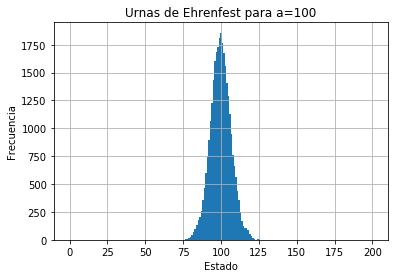

In [60]:
#HISTOGRAMA. 
#PARA USAR ESTA CELDA TAL CUAL, TIENES QUE HABER ALMACENADO LOS ESTADOS 
#POR LOS QUE SE HA PASADO EN UNA LISTA LLAMADA estados.

import matplotlib.pyplot as plt #DESCOMENTAR SI AÚN NO SE HA CARGADO ESTA LIBRERÍA

plt.title(u"Urnas de Ehrenfest para a="+str(a)) # Título del histograma
plt.xlabel("Estado") # Etiqueta para el eje x
plt.ylabel("Frecuencia") # Etiqueta para el eje y
plt.grid(True)
marcas=[j-.5 for j in xrange(0,2*a+2)] # Clases
plt.hist(estados,bins=marcas) # Histograma
titulo='Histograma'+str(a)+'.png' # Título de la figura
#plt.savefig(titulo) # Descomentamos si queremos salvar la figura
plt.show(titulo)
plt.close() #Puesto que no la vamos a usar más, cerramos la librería

In [59]:
print('alkdsufhadf '+str(a))

alkdsufhadf 100
